In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
%ls

'10th Mark sheet.jpg'
'12th marksheet.pdf'
 Aadhar.pdf
'Assignment for graymatics.zip'
 Assingnment/
'Colab Notebooks'/
'Custom objection lib'/
 darknet/
'Digital_Certificate from RGPV .pdf'
 emertxe_internship_certificate_Raghav_Sharma.pdf
'Enterprise Bot Assignment.zip'
 Files/
'Google Photos'/
 i2v/
'image captioning.mkv'
 openinapp.zip
'PAN card.jpg'
'Raghav java progates.pdf'
'Raghav Sharma cloud computing  certificate.pdf'
'RAGHAV SHARMA.pdf'
'Raghav'\''s Resume (1).pdf'
"Raghav's Resume.pdf"
'resume photo-min.jpg'
 Surveillance_car_video.mp4
 vgg16/


In [ ]:
%cd i2v/vgg16/

/content/drive/MyDrive/i2v/vgg16


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from matplotlib import pyplot as plt

In [ ]:
# Set image size
IMAGE_SIZE = [180, 180]
# Define paths for training and validation data
train_path = '/content/drive/MyDrive/vgg16/dataset/train'   # Change with your train path
valid_path = '/content/drive/MyDrive/vgg16/dataset/val'     # Change with your validation path

In [ ]:
# Load VGG16 model with pre-trained weights
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# Freeze the layers of VGG16
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# Flatten the output of VGG16
x = Flatten()(vgg16.output)

In [ ]:
# Add a fully connected layer with softmax activation for 27 classes
prediction = Dense(27, activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# View the structure of the model
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [ ]:
# Model Compilation
model.compile(
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.Precision(name='precision'),
        'accuracy',
        keras.metrics.Recall(name='recall'),],optimizer='adam')

In [ ]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='categorical'
)

Found 3359 images belonging to 27 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='categorical'
)

Found 359 images belonging to 27 classes.


In [ ]:
class_names = ['Audi','BMW','Chevrolet','Datsun','Fiat','Ford','Honda','Hyundai','ISUZU','Jaguar','Jaguar.rear','Jeep','Kia','Kia.new','Mahindra','Maruti-Suzuki','Mercedes-Benz','MG-Motor','Mitsubishi','Nissan','Renault','Skoda','Tata','Tata.text','Toyota','Volkswagen','Volvo']
print(class_names)

['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jaguar.rear', 'Jeep', 'Kia', 'Kia.new', 'Mahindra', 'Maruti-Suzuki', 'Mercedes-Benz', 'MG-Motor', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Tata.text', 'Toyota', 'Volkswagen', 'Volvo']


In [ ]:
# Define the paths for saving the best and last models
best_model_path = ''
last_model_path = ''

# Define the callbacks
callbacks = [
    ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True),
    ModelCheckpoint(last_model_path, save_weights_only=False, save_freq='epoch')
]

In [ ]:
# Train the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=callbacks
)

Epoch 1/10
210/210 [==============================] - ETA: 0s - loss: 0.9763 - precision: 0.9611 - accuracy: 0.7374 - recall: 0.6103

210/210 [==============================] - 42s 192ms/step - loss: 0.9763 - precision: 0.9611 - accuracy: 0.7374 - recall: 0.6103 - val_loss: 0.5830 - val_precision: 0.9458 - val_accuracy: 0.8384 - val_recall: 0.7772
Epoch 2/10
210/210 [==============================] - ETA: 0s - loss: 0.3438 - precision: 0.9794 - accuracy: 0.9125 - recall: 0.8506

210/210 [==============================] - 39s 186ms/step - loss: 0.3438 - precision: 0.9794 - accuracy: 0.9125 - recall: 0.8506 - val_loss: 0.5558 - val_precision: 0.9393 - val_accuracy: 0.8496 - val_recall: 0.8189
Epoch 3/10
210/210 [==============================] - ETA: 0s - loss: 0.2347 - precision: 0.9777 - accuracy: 0.9339 - recall: 0.9003

210/210 [==============================] - 40s 190ms/step - loss: 0.2347 - precision: 0.9777 - accuracy: 0.9339 - recall: 0.9003 - val_loss: 0.3994 - val_precision: 0.9268 - val_accuracy: 0.8886 - val_recall: 0.8468
Epoch 4/10
210/210 [==============================] - ETA: 0s - loss: 0.2005 - precision: 0.9821 - accuracy: 0.9479 - recall: 0.9155

210/210 [==============================] - 38s 182ms/step - loss: 0.2005 - precision: 0.9821 - accuracy: 0.9479 - recall: 0.9155 - val_loss: 0.4126 - val_precision: 0.9325 - val_accuracy: 0.8969 - val_recall: 0.8468
Epoch 5/10
210/210 [==============================] - ETA: 0s - loss: 0.1569 - precision: 0.9824 - accuracy: 0.9556 - recall: 0.9318

210/210 [==============================] - 39s 184ms/step - loss: 0.1569 - precision: 0.9824 - accuracy: 0.9556 - recall: 0.9318 - val_loss: 0.4445 - val_precision: 0.9275 - val_accuracy: 0.8802 - val_recall: 0.8552
Epoch 6/10
210/210 [==============================] - ETA: 0s - loss: 0.1210 - precision: 0.9861 - accuracy: 0.9687 - recall: 0.9491

210/210 [==============================] - 42s 200ms/step - loss: 0.1210 - precision: 0.9861 - accuracy: 0.9687 - recall: 0.9491 - val_loss: 0.3726 - val_precision: 0.9431 - val_accuracy: 0.9081 - val_recall: 0.8774
Epoch 7/10
210/210 [==============================] - ETA: 0s - loss: 0.1147 - precision: 0.9880 - accuracy: 0.9699 - recall: 0.9553

210/210 [==============================] - 40s 192ms/step - loss: 0.1147 - precision: 0.9880 - accuracy: 0.9699 - recall: 0.9553 - val_loss: 0.3062 - val_precision: 0.9467 - val_accuracy: 0.9220 - val_recall: 0.8914
Epoch 8/10
210/210 [==============================] - ETA: 0s - loss: 0.0831 - precision: 0.9878 - accuracy: 0.9777 - recall: 0.9646

210/210 [==============================] - 36s 172ms/step - loss: 0.0831 - precision: 0.9878 - accuracy: 0.9777 - recall: 0.9646 - val_loss: 0.3427 - val_precision: 0.9384 - val_accuracy: 0.9081 - val_recall: 0.8914
Epoch 9/10
210/210 [==============================] - ETA: 0s - loss: 0.0821 - precision: 0.9888 - accuracy: 0.9783 - recall: 0.9702

210/210 [==============================] - 38s 181ms/step - loss: 0.0821 - precision: 0.9888 - accuracy: 0.9783 - recall: 0.9702 - val_loss: 0.3963 - val_precision: 0.9443 - val_accuracy: 0.9081 - val_recall: 0.8969
Epoch 10/10
210/210 [==============================] - ETA: 0s - loss: 0.0691 - precision: 0.9882 - accuracy: 0.9821 - recall: 0.9726

210/210 [==============================] - 37s 176ms/step - loss: 0.0691 - precision: 0.9882 - accuracy: 0.9821 - recall: 0.9726 - val_loss: 0.3487 - val_precision: 0.9474 - val_accuracy: 0.9192 - val_recall: 0.9025


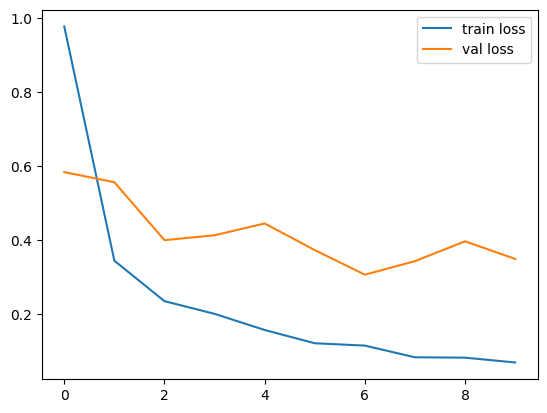

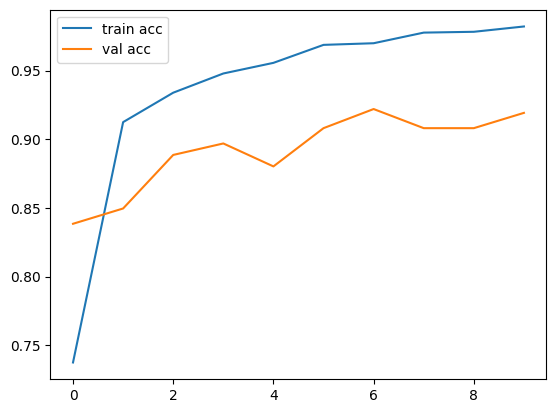

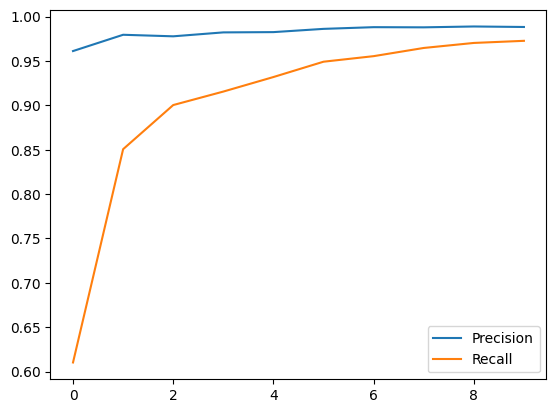

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing loss of test and train
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
print()
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
print()
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['recall'], label='Recall')
plt.legend()
plt.show()
plt.savefig('prec_rec')


In [ ]:
#saving model
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/i2v/vgg16/vgg16_model.h5'
# Save the model
model.save(model_path)

In [ ]:
#evaluating model with respect to train
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(training_set)

210/210 [==============================] - 34s 160ms/step - loss: 0.0664 - precision: 0.9930 - accuracy: 0.9839 - recall: 0.9726


In [ ]:
#evaluating model with respect to test
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(test_set)

23/23 [==============================] - 1s 51ms/step - loss: 0.3487 - precision: 0.9474 - accuracy: 0.9192 - recall: 0.9025


In [ ]:
pred_X = model.predict(training_set)

210/210 [==============================] - 33s 157ms/step


In [ ]:
pred_Y = model.predict(test_set)

23/23 [==============================] - 1s 59ms/step


In [ ]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)

Test Loss: 0.06640008836984634
Test Accuracy: 0.993009090423584
Test Precision: 0.9839237928390503
Test Recall: 0.9726108908653259
Validation Loss: 0.3486999571323395
Validation Accuracy: 0.9473684430122375
Validation Precision: 0.9192200303077698
Validation Recall: 0.902506947517395


1/1 [==============================] - 0s 21ms/step


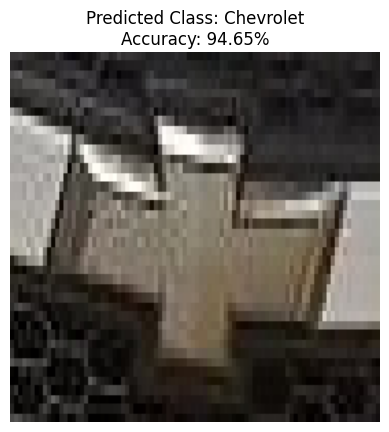

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load your own weights
weights_path = '/content/drive/MyDrive/vgg16/vgg16_model.h5'
model.load_weights(weights_path)

# Define the path to your image
image_path = '/content/drive/MyDrive/vgg16/dataset/train/Chevrolet.common/Chevrolet_002.jpg'

img = image.load_img(image_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_index = np.argmax(score)
class_name = class_names[class_index]
accuracy = score[class_index] * 1000

plt.imshow(img)
plt.title(f"Predicted Class: {class_name}\nAccuracy: {accuracy:.2f}%")
plt.axis("off")
plt.show()
